# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [156]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import iqr, linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [157]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
# num_mice = len(combined_data["Mouse ID"].value_counts())
print(f"Number of unique mice: {num_mice}")
# num_mice 

Number of unique mice: 249


In [158]:
# Our data should be uniquely identified by Mouse ID and Timepoint
unique_mouse_id = combined_data[["Mouse ID", "Timepoint"]]
unique_mouse_id.head()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_id
#(subset=["Mouse ID", "Timepoint"], keep=False)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [159]:
duplicate_id = duplicate_mice_id["Mouse ID"].unique()

In [160]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_id_df = combined_data.loc[combined_data["Mouse ID"].isin(duplicate_id),:] 
duplicate_mice_id_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [161]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data = combined_data.drop_duplicates(subset="Mouse ID")
#clean_data.tail()
clean_data = combined_data.loc[~combined_data["Mouse ID"].isin(["g989"])]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [162]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = len(clean_data["Mouse ID"].value_counts())
clean_num_mice

248

## Summary Statistics

In [163]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_df = combined_data.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = grouped_df["Tumor Volume (mm3)"].mean()
median = grouped_df["Tumor Volume (mm3)"].median()
variance = grouped_df["Tumor Volume (mm3)"].var()
std_dev = grouped_df["Tumor Volume (mm3)"].std()
sem = grouped_df["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": mean,
                           "Median Tumor Volume": median, 
                           "Tumor Volume Variance": variance, 
                           "Tumor Volume Std. Dev.": std_dev,
                           "Tumor Volume Std. Err.": sem})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [164]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_table = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg({"mean","median","var","std",lambda x: st.sem(x, ddof=1)})
summary_stats_table.columns = pd.MultiIndex.from_product([["Tumor Valume (mm3)"],["mean","median","var","std","sem"]])

summary_stats_table


Tumor Valume (mm3)                                          
                           mean    median       var        std        sem
Drug Regimen                                                             
Capomulin             40.675741  0.329346  4.994774  41.557809  24.947764
Ceftamin              52.591172  0.469821  6.268188  51.776157  39.290177
Infubinol             52.884795  0.492236  6.567243  51.820584  43.128684
Ketapril              55.235638  0.603860  8.279709  53.698743  68.553577
Naftisol              54.331565  0.596466  8.134708  52.509285  66.173479
Placebo               54.033581  0.581331  7.821003  52.288934  61.168083
Propriva              52.322552  0.512884  6.507770  50.854632  42.351070
Ramicane              40.216745  0.320955  4.846308  40.673236  23.486704
Stelasyn              54.233149  0.573111  7.710419  52.431737  59.450562
Zoniferol             53.236507  0.516398  6.966589  51.818479  48.533355

## Bar and Pie Charts

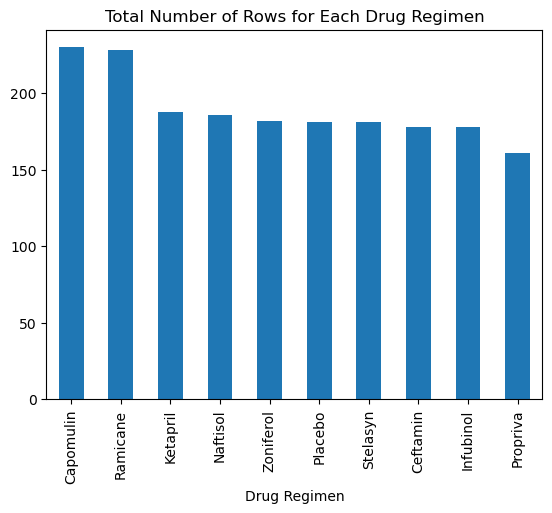

In [165]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = combined_data.groupby("Drug Regimen").size()

#sort counts in descending order
drug_regimen_counts = drug_regimen_counts.sort_values(ascending=False)

#Generate bar plot using Pandas
drug_regimen_counts.plot(kind="bar", title="Total Number of Rows for Each Drug Regimen")

#Show plot
plt.show()

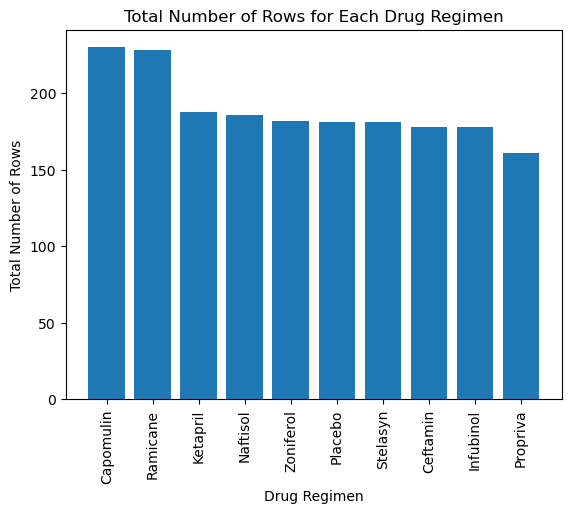

In [166]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = combined_data.groupby("Drug Regimen").size()

#sort counts in descending order
drug_regimen_counts = drug_regimen_counts.sort_values(ascending=False)

#Generate bar plot
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)

plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.title("Total Number of Rows for Each Drug Regimen")

# Adjust x axis labels
plt.xticks(rotation="vertical")

#Show plot
plt.show()

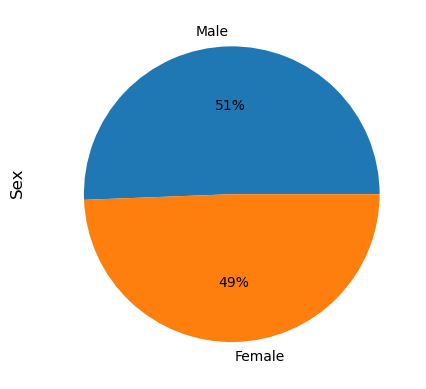

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drug_regimen_counts = combined_data.groupby("Sex").size()

#Sort counts in descending order
drug_regimen_counts = drug_regimen_counts.sort_values(ascending=False)

#Generate plot using Pandas
drug_regimen_counts.plot(kind="pie", autopct="%1.0f%%")

#Move title to left of pie plot
plt.text(-1.5,0,"Sex", rotation=90,size="large")

#Show plot
plt.show()

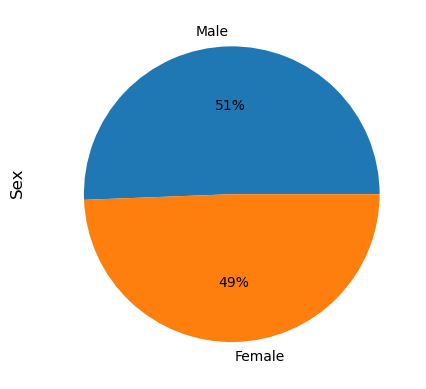

In [168]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
drug_regimen_counts = combined_data.groupby("Sex").size()

#sort counts in descending order
drug_regimen_counts = drug_regimen_counts.sort_values(ascending=False)

#Generate a pie plot using pyplot
plt.pie(drug_regimen_counts.values, labels=drug_regimen_counts.index,autopct="%1.0f%%")

#move title to left of pie plot
plt.text(-1.5, 0, "Sex", rotation=90, size="large")

#show the plot
plt.show()



## Quartiles, Outliers and Boxplots

In [169]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_data = combined_data[combined_data["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint,filtered_data, on=["Mouse ID", "Timepoint"],how="left")


In [170]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr_val = iqr(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr_val)
    upper_bound = upperq + (1.5*iqr_val)
    outliers = tumor_volumes[(tumor_volumes <lower_bound) | (tumor_volumes > upper_bound)]

    print(f"{treatment}'s potential outliers are: {outliers}, end=""")


Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64), end=
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64), end=
Infubinol's potential outliers are: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64, end=
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64), end=


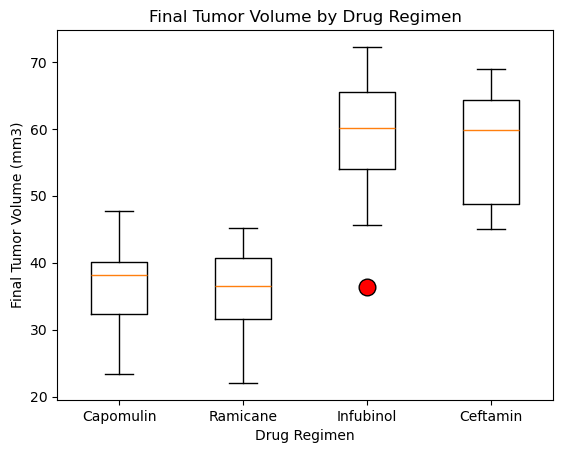

In [171]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#put treatments into a list for a for loop and plot labels
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

#create an empty list to fill with tumor vol data for plotting
tumor_vol_data=[]

#calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    #locate the rows which contain mice for each drug and get the tumor volumes
    tumor_volumes = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    #add subset
    tumor_vol_data.append(tumor_volumes)

#define properties for outliers
flierprops = dict(marker="o", markerfacecolor="red", markersize=12, linestyle="none")

#generate a box plot for final tumor volume of each mouse across the regimens
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)

plt.title("Final Tumor Volume by Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")

#show box plot
plt.show()
    

## Line and Scatter Plots

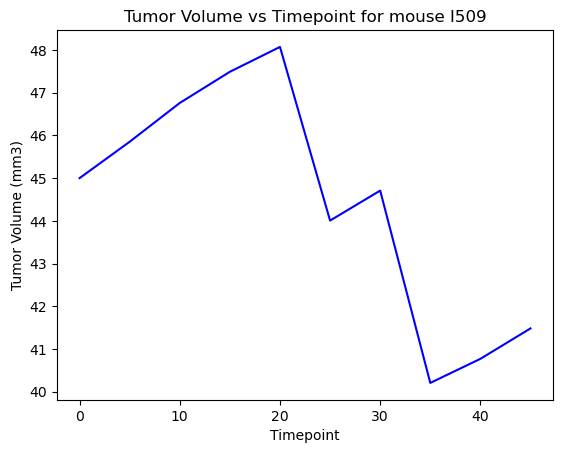

In [172]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#filter dataframe to include only the data for a single mouse treated with Capomulin
mouse_data = combined_data[(combined_data["Drug Regimen"] == "Capomulin") & (combined_data["Mouse ID"] == "l509")]

#generate a line plot of tumor volume vs time point
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="", color="blue", linestyle="-")

# set increments for x and y axis

plt.title("Tumor Volume vs Timepoint for mouse I509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

#show the plot
plt.show()


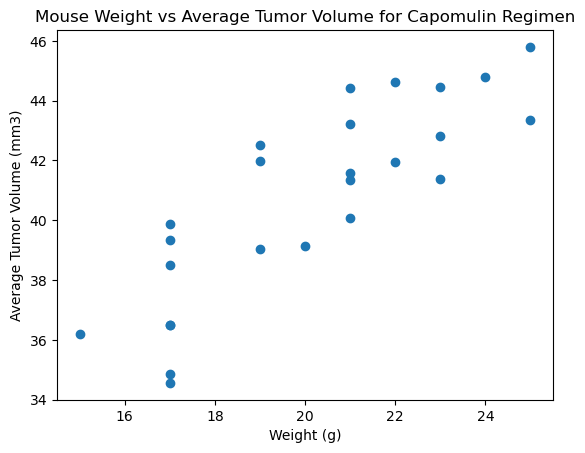

In [173]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#filter the dataframe to include only the dat for the capomulin regimen
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

#calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

#get weight of each mouse
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

#generate a scatter plot of mouse weight vs average tumor volume
plt.scatter(mouse_weight, average_tumor_volume)

plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#show plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


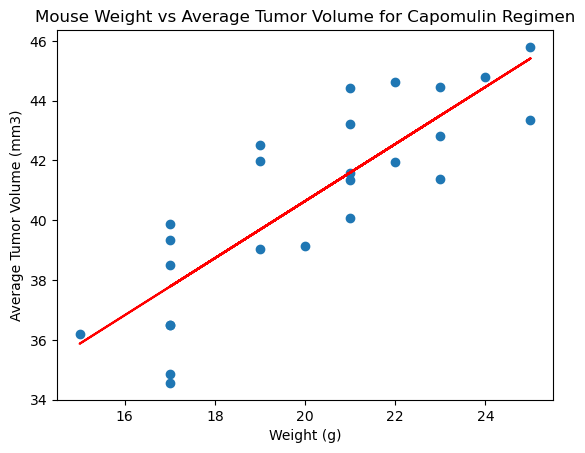

In [178]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

#calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

#get weight of each mouse
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

#calculate the correlation coefficient
correlation = mouse_weight.corr(average_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}") 

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight*slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

#generate the scatter plot
plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, regress_values, "r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#show plot
plt.show()